## building Simple FFNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [2]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [3]:
data_path = '/media/mahfuz/Media/datasets/MNIST_dataset/mnist_train.csv'

In [4]:
df = pd.read_csv(data_path)
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df['label']
X = df.drop('label', axis=1)

In [6]:
X.sample(10).iloc[:, 200:]

,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
56526,0,0,0,0,79,251,253,127,0,0,...,0,0,0,0,0,0,0,0,0,0
53497,0,0,0,0,0,0,0,0,16,75,...,0,0,0,0,0,0,0,0,0,0
54126,0,0,0,0,0,18,233,171,20,3,...,0,0,0,0,0,0,0,0,0,0
29973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43593,0,0,0,0,0,0,0,7,167,254,...,0,0,0,0,0,0,0,0,0,0
13377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51339,0,0,0,0,0,0,0,0,32,234,...,0,0,0,0,0,0,0,0,0,0


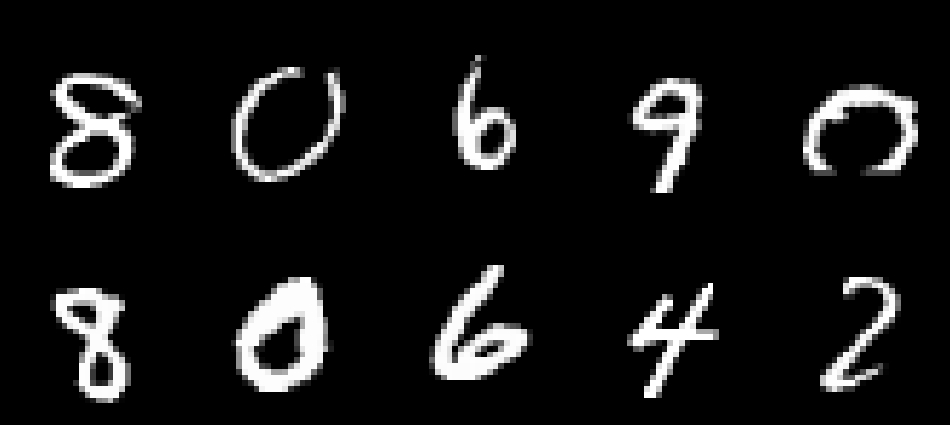

In [7]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,6000, size=10)
for i in range(10):
    axes[i].imshow(X.iloc[idx[i],:].values.reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the exes ticks 
    axes[i].set_title(str(int(y[idx[i]])), color='black', fontsize=25)
plt.show()

In [8]:
# trian and text val dataset splitting 
x_t, x_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=0.2, random_state=42)

In [9]:
# Normalizeing the dataset

normalizer = Normalizer()
x_train = normalizer.fit_transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)

In [10]:
lst = list(range(1,11))

In [11]:
lst[0]

1

## Dataset & DataLoader
1. Basic idea behind the ```Dataset``` and ```DataLoader``` class is to be decoupled from our model training code for beter readability and modularity. 
2. PyTorch provides two data primitive: ```torch.utils.data.DataLoader``` and ```torch.utils.data.Datasets``` that allow you to use pre-loader datasets as well as your own data. 
3. ```Dataset``` class stores the samples and their corresponding labels, and ```DataLoader``` class wraps an iterable around the Dataset to enable easy access to the samples.

## Data Class
A custom Dataset class must implement thre functions: ```__init__```, ```__len__``` and ```__getitem__```.
1. The ```__init__``` function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both tranforms 
2. The ```__len__`` funcition returns the number of samples in our dataset.
3. The ```__getitem__``` function loads and returns sample from the dataset at the given index idx. Based on the index, it identifies the sample and label and return it as a tuple.

In [12]:
# Example code to understand dataset and DataLoader
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Define the custom Dataset
class SquareDataset(Dataset):
    def __init__(self, n):
        self.n = n

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        sample = {'number': idx, 'square': idx ** 2}
        return sample

# Step 2: Create an instance of the dataset
dataset = SquareDataset(n=10)

# Step 3: Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Step 4: Iterate through the DataLoader
for batch in dataloader:
    print(batch)


{'number': tensor([4, 9]), 'square': tensor([16, 81])}
{'number': tensor([3, 7]), 'square': tensor([ 9, 49])}
{'number': tensor([5, 2]), 'square': tensor([25,  4])}
{'number': tensor([1, 6]), 'square': tensor([ 1, 36])}
{'number': tensor([0, 8]), 'square': tensor([ 0, 64])}


In [13]:
# Make a custom dataset. 
class customer_dataset(Dataset):
    def __init__(self, features, label):
        self.features = features
        self.label = label

    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self, idx):
        sample = self.features[idx]
        label = self.label.values[idx]
        sample_tensor = torch.tensor(sample, dtype=torch.float32)
        label_tensor = torch.tensor(label, dtype=torch.long)
        return sample_tensor, label_tensor
            

In [14]:
train_dataset = customer_dataset(x_train, y_train)
val_dataset = customer_dataset(x_val, y_val)
test_dataset = customer_dataset(x_test, y_test)

## DataLoader class
The Dataset retrives our dataset's features and label one sample at a time. While training a model, we typically want to pass smaple in 'minibatches', reshuffle the data at every epoch to reduce model overfitting and use python's multiprocessing to speed up data retrival.

```DataLoader is an iterable that abstracts this compliexity for  us in an easy API```

When we load the dataset into DataLoader and we can iterate through the dataset as needed.

In [15]:
batch_size = 64 

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [16]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [17]:
data, label = next(iter(train_dataloader))
print(data[:, 278:300])
print(label)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1051, 0.0843, 0.0062],
        [0.0000, 0.0000, 0.0000,  ..., 0.0839, 0.1208, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0808, 0.0808, 0.0808],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0936, 0.0936, 0.0451],
        [0.0000, 0.0000, 0.0000,  ..., 0.0828, 0.0828, 0.0828],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
tensor([0, 8, 8, 9, 5, 3, 7, 3, 2, 4, 4, 0, 9, 6, 8, 4, 8, 1, 8, 8, 0, 3, 1, 1,
        2, 6, 1, 6, 3, 7, 1, 2, 6, 4, 8, 7, 6, 8, 6, 0, 9, 6, 5, 2, 3, 1, 9, 3,
        2, 4, 2, 6, 0, 0, 1, 9, 8, 9, 8, 0, 2, 3, 3, 5])


In [18]:
data.size()

torch.Size([64, 784])

## ```torch.nn.module``` and ```torch.nn.Parameter```

Except for ```Parameter```, the classes we will be discussinga are all subclasses of ```torch.nn.Module```. 

```torch.nn.module``` is the Pytorch base class which is meant to encapsulate behaviors specific to ```PyTroch Models``` and their ```Component``` like activation functions etc. 

One of the important behavior of ```torch.nn.Moudle``` is registering(Intializing) parameters for the layers as instance of ```torch.nn.Parameter``` class. 

### Simple Model

In [19]:
class model_1(nn.Module):
    def __init__(self):
        super.__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)

        return x
    

## Using nn.Sequential
1. This approach represent Model as a sequence of Operations
2. It the concise way to define a model, but offers less flexibility for model that require complex data flows or custom.
4. ```nn.Sequential``` expect modules as it's argument

In [20]:
class SeqModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layer = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        return self.layer(x)

### Using Batch Normalization and Dropout layer

In [21]:
class Model(nn.Module):

    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.fc1 = nn.Linear(784, 512)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.dropout_1 = nn.Dropout(p = 0.2)
        self.fc2 = nn.Linear(512,512)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.relu2 = nn.ReLU()
        self.dropout_2 = nn.Dropout(p = 0.2)
        self.fc3 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = self.dropout_1(self.relu1(self.batch_norm1(self.fc1(x))))
        x = self.dropout_2(self.relu2(self.batch_norm2(self.fc2(x))))
        x = self.fc3(x)
        return x

In [22]:
model = Model().to(device=device)

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 100
best_loss = 1e9
patience = 5

In [24]:
a = torch.tensor(5)
a.item()

5

In [25]:
# Training of a model

for epoch in range(epochs):
  

    # Training
    model.train()
    train_loss = 0
    train_count = 0
    train_pred = 0
    for data,label in train_dataloader:
        data,label = data.to(device),label.to(device)
        pred = model(data)
        loss = loss_fn(pred,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
        train_count += 1

    train_loss = train_loss / train_count


    # Validation
    with torch.no_grad():
        model.eval()
        val_loss = 0
        val_count = 0
        val_pred = 0
        for data,label in val_dataloader:
            data,label = data.to(device),label.to(device)
            pred = model(data)
            loss = loss_fn(pred,label)
            val_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
            val_count += len(label)
            val_loss += loss.item()

        val_loss = val_loss / val_count

        if val_loss < best_loss:
            count = 0
            best_loss = val_loss
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': best_loss,
            }
            torch.save(checkpoint, f"Model checkpoint: {epoch+1}")
        else:
            count += 1
        if count == patience:
            print("Early Stopping !!!")
            break

        if epoch%10 == 0:
            print(f"{epoch+1}: train_loss = {train_loss:.7f} | val_loss = {val_loss:.7f} " )


1: train_loss = 0.2268229 | val_loss = 0.0017028 
11: train_loss = 0.0264401 | val_loss = 0.0011525 
Early Stopping !!!


## Test Model

In [35]:
# Load the saved model checkpoint
checkpoint_path = '/home/mahfuz/Desktop/nlpcheck/2_data_preprocessing/pytorch_tutorial/Model checkpoint: 7'
checkpoint = torch.load(checkpoint_path)

# Assuming model and optimizer are defined elsewhere in your code
model.load_state_dict(checkpoint['model_state_dict'])

# Put model in evaluation mode
model.eval()

# Load your test dataset
# Assuming test_dataloader is defined elsewhere in your code and loaded with test data
test_dataloader = test_dataloader

# Initialize variables to monitor test performance
test_loss = 0
correct = 0

# No gradient updates needed for testing
with torch.no_grad():
    for data, label in test_dataloader:
        data, label = data.to(device), label.to(device)
        pred = model(data)
        loss = loss_fn(pred, label)
        test_loss += loss.item()
        correct += (pred.argmax(1) == label).sum().item()

# Calculate average loss and accuracy over the test set
test_loss /= len(test_dataloader.dataset)
test_accuracy = 100. * correct / len(test_dataloader.dataset)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.0011, Test Accuracy: 98.12%


In [ ]:
epoch = checkpoint['epoch']